<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>ANN Notebook</b></p>

# <font color='steelblue'> <b>Importing Libraries</b><font color='black'>  

**TensorFlow** is an open-source deep learning library developed and maintained by Google. It provides data flow programming to perform a variety of machine learning tasks.

The flexible structure of TensorFlow allows computations to be performed across all platforms using a single API (Application Programming Interface).

TensorFlow operates using one or more Central Processing Units (CPU) and Graphics Processing Units (GPU) to handle tasks such as deployment and execution. Although it was originally developed using the Python programming language, TensorFlow also supports many other programming languages such as C++, Java, C#, and JavaScript in modern applications.

With JavaScript support through TensorFlow.js, numerous AI-related tasks can be performed directly in web browsers.

**KERAS** is an open-source neural network library written in Python that runs on top of Theano or TensorFlow. It is designed to be modular, fast, and easy to use. Developed by François Chollet, a Google engineer, Keras is a handy library for building any deep learning alorithm.


In [3]:
# pip install keras

In [2]:
# pip install tensorflow

In [5]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# <font color='steelblue'> <b>Loading The Dataset</b><font color='black'>  

In [9]:
df = pd.read_csv("fake_reg.csv")

In [11]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [13]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


# <font color='steelblue'> <b>Understanding The Data & EDA</b><font color='black'>  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [17]:
df.describe()

,price,feature1,feature2
count,1000.000,1000.000,1000.000
mean,498.673,1000.014,999.980
std,93.785,0.974,0.948
min,223.347,997.058,996.996
25%,433.026,999.332,999.316
50%,502.382,1000.010,1000.002
75%,564.922,1000.638,1000.645
max,774.408,1003.208,1002.666


In [19]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


# <font color='steelblue'> <b>Data Preparation</b><font color='black'>  

**NumPy** is a library used for managing multi-dimensional arrays. NumPy is specifically optimized for mathematical operations and can efficiently handle large datasets. NumPy arrays compress data to minimize memory usage and are optimized for high-speed processing.

A **DataFrame** is a structure used to handle tabular data, provided by the Pandas library. A DataFrame organizes data into rows and columns and stores it with labels. It is useful for many data manipulation tasks, especially for filtering, sorting, merging, grouping, and transforming data in various ways.

**Differences Between DataFrame and NumPy:**

- While a DataFrame stores data with labels, NumPy arrays store data in a sequential order.
- A DataFrame can store data in columns with different data types, whereas NumPy arrays store data of the same type.
- Many data scientists prefer to use DataFrames for data preprocessing, while NumPy arrays are preferred for model training and prediction because they are faster and more efficient to process.

Artificial Neural Networks (ANNs) often use NumPy arrays as input. Therefore, converting columns from a DataFrame into a NumPy array is necessary to feed data into an ANN model.

However, other machine learning models (e.g., decision trees or support vector machines) can work directly with DataFrames, so you don’t need to convert data into a NumPy array. Thus, the choice depends on your data structure and the machine learning model yo are using.


In [23]:
from sklearn.model_selection import train_test_split

**X = df[['feature1', 'feature2']].values  
y = df['price'].values**

With the **"values"** operation above, we convert the data into a NumPy array. However, this conversion is automatically performed during **train_test_split** and **scaling** processes. 

Since we will train the model with **X** directly in the final model without splitting into train and test sets, we can perform this NumPy conversion here in advnce.


In [25]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [27]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [29]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
X_train.shape

(700, 2)

In [35]:
X_test.shape

(300, 2)

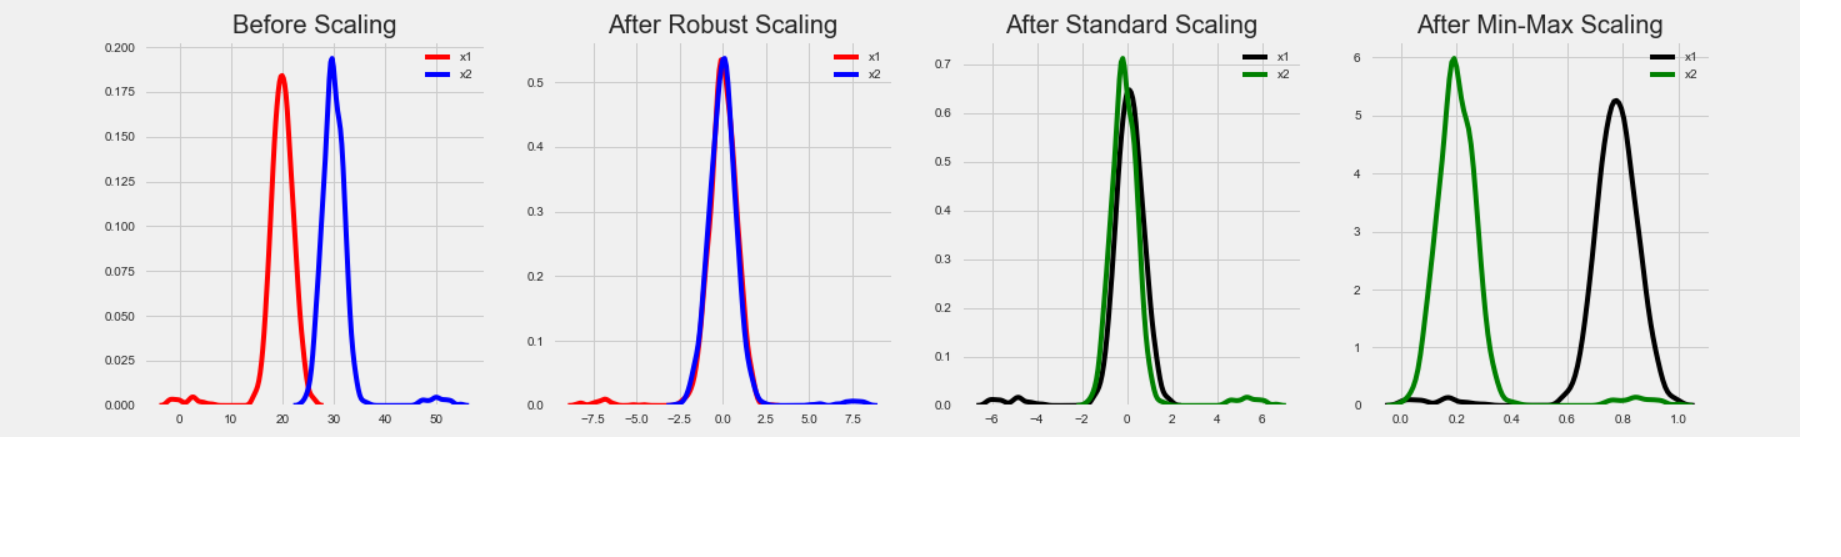

**Min-Max Scaler:** This method scales the data to a specific range. It is done by scaling the data between the minimum and maximum values. This method is commonly used to scale data between 0 and 1.

**Standard Scaler:** This method scales the data to have a mean of 0 and a standard deviation of 1. It centralizes the distribution of the data and is typically used when the data is normally distributed.

**Robust Scaler:** This method scales the data based on the median and interquartile range. It centralizes the data distribution and is preferred when there are outliers in the dataset.

**Note==>** In general, we prefer using Min-Max Scaler in our DL (Deep Learning) studies because it keeps high-load inputs within the range o 0-1.


In [37]:
from sklearn.preprocessing import MinMaxScaler 

In [17]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [39]:
scaler = MinMaxScaler() 

In [41]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.max()

1.0

In [45]:
X_train.min()

0.0

# <font color='steelblue'> <b>Modeling</b><font color='black'>  

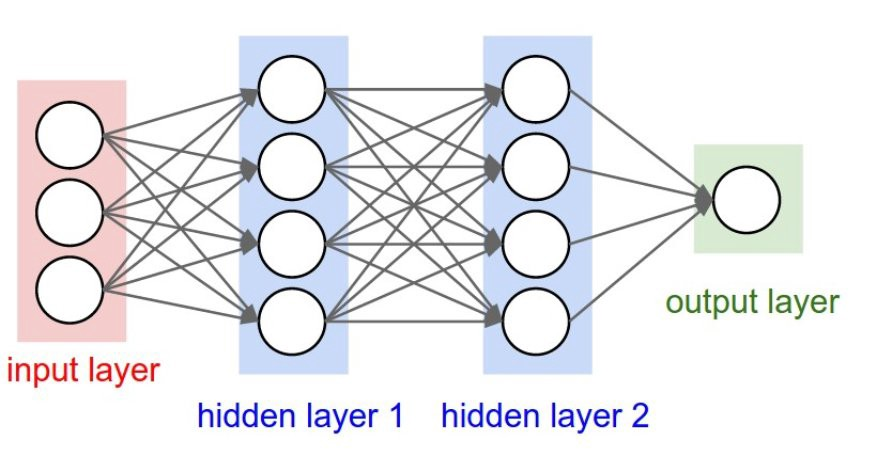

In [47]:
import tensorflow as tf

In [49]:
from keras import models

In [51]:
from tensorflow.keras.layers import Dense, Activation

In [53]:
from tensorflow.keras.models import Sequential


In [30]:
help(Sequential) # this is the structure that allows creating consecutive layers. First, the model must be defined as sequential.

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(layers=None, trainable=True, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When u

In [31]:
help(Dense) # layer 

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

**Sequential** class is used to add layers to a model in a sequential manner. In this structure, the output of each layer is used as the input for the next layer, which simplifies the model-building process.

**Dense**, on the other hand, is a class used to create fully connected layers. In fully connected layers, all outputs from the previous layer are passed as inputs to the next layer.

In summary, the **Sequential** class is used to stack layers in order, while the **Dense** class is used to create fully connected layers. In a Sequential model, each layer can be created using the Dense clss.


In [55]:
# First way to create model

model = Sequential([Dense(units = 4, input_dim=2, activation = "relu"),  # each dense defines a layer
                    Dense(units = 4, activation = "relu"),              # units specify the number of neurons
                    Dense(units = 4, activation = "relu"),              # activation function is ReLU, tanh could also be chosen
                    Dense(units = 1)])                                  # output layer - since it's a regression problem, there's 1 output

**input_dim** is a parameter used to specify the number of input features in the first layer of a neural network model. Here, we provided the input size because we know it, but even if we don’t specify it, the model can detect it automatically.

**units** refers to the number of neurons. There is no strict rule, but values like 4, 8, 16, 32, 64, 128, etc., are recommended as a best practice approac.


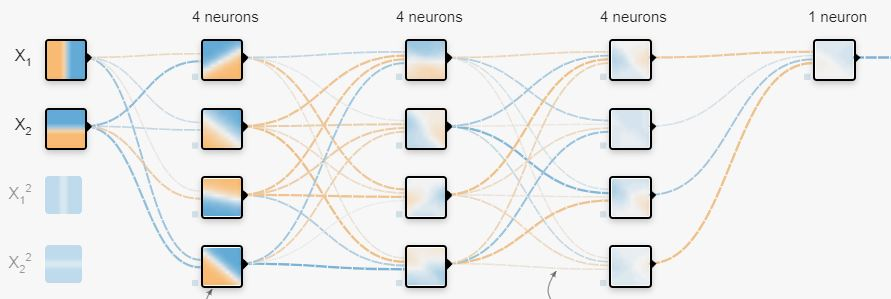

In [57]:
# Second way to create model (recommended method)

model = Sequential()
model.add(Dense(units = 8, input_dim = X_train.shape[1], activation = "relu"))     
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1))                             

The number of columns in the **X_train** dataset, i.e., the number of features, is assigned to the **input_dim** variable. This means that each data sample fed into the model will be a vector with a size of **input_dim**. This allows the model to know the expected input vector size and process these vectors to produce outputs.

The expression **X_train.shape[1]** returns a NumPy array representing the shape of the **X_train** dataset as **(n_samples, n_features)**. Here, **n_features** represents the number of features, and **X_train.shape[1]** is equal to this valu.


In [59]:
# Third way without input_dim

model = Sequential()

model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) 

In [61]:
model.compile(optimizer="rmsprop", loss="mse")

# model has been established, how this model will work is determined here.
# optimizer finds minimum cost and optimizes backwards. rmsprop or adam can be used.
# loss function, mse is generally used in regression problems.

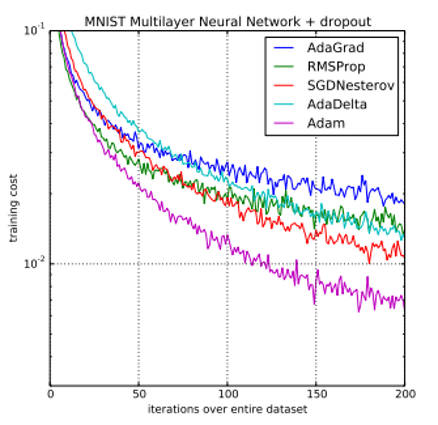

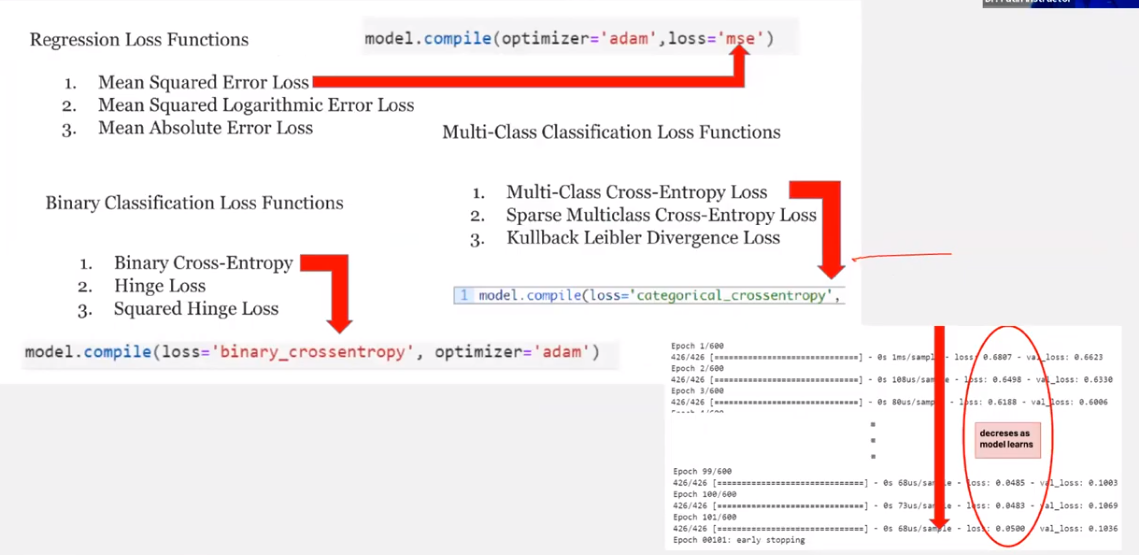

In [69]:
model.summary() # indicates how many parameters are in each layer.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59 (240.00 B)

The scaled **X_train** data is trained using the model's **fit()** method. **y_train** is the target variable, representing the outputs that the model needs to learn.


In [63]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 1) 

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 257152.4688


In [65]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 350) 

Epoch 1/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259957.4688 
Epoch 2/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255385.0156 
Epoch 3/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256947.4375 
Epoch 4/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255055.1250 
Epoch 5/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256811.8438 
Epoch 6/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255706.2344 
Epoch 7/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255737.8594 
Epoch 8/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252544.5156 
Epoch 9/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257096.2344 
Epoch 10/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252703.8125 
Epoch 11/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252331.5781 
Epoch 12/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256552.3125 
Epoch 13/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252580.2188 
Epoch 14/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

In [67]:
model.weights 

[<Variable path=sequential_2/dense_9/kernel, shape=(2, 4), dtype=float32, value=[[-1.0597862   2.5832255  -0.45762062  0.0986224 ]
  [ 0.2843122   5.2509923  -0.8142493  -0.843066  ]]>,
 <Variable path=sequential_2/dense_9/bias, shape=(4,), dtype=float32, value=[-0.14573395  0.9997219   0.         -0.05383233]>,
 <Variable path=sequential_2/dense_10/kernel, shape=(4, 4), dtype=float32, value=[[-1.8408215e-01 -5.8856887e-01 -8.0198401e-01 -8.3398765e-01]
  [ 3.5014141e+00  3.8724632e+00  4.3012891e-02 -2.0941626e-03]
  [ 7.2267991e-01  8.5307604e-01  2.0057148e-01  5.8712405e-01]
  [ 2.6614839e-01 -1.6996270e-01  7.0593244e-01 -6.6951585e-01]]>,
 <Variable path=sequential_2/dense_10/bias, shape=(4,), dtype=float32, value=[ 0.5910087   0.9752856  -0.35887888 -0.00316228]>,
 <Variable path=sequential_2/dense_11/kernel, shape=(4, 4), dtype=float32, value=[[ 2.7371087  -0.24981803 -0.32569343 -0.22438735]
  [ 3.691965   -0.03412706 -0.2496475  -0.3592217 ]
  [-0.10592017 -0.63438886 -0.2008

**When an epoch is completed, the average of all batch loss values constitutes the epoch loss value.**


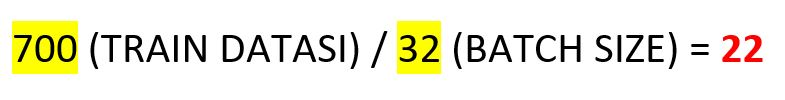

The number of iterations can be calculated by dividing the number of samples in the dataset by the batch size. In this case:

With 700 data samples and a batch size of 32, the number of iterations is calculated as follows:

700 / 32 = 21.875

Since the batch size must be an integer, an additional iteration is performed for the remaining samples in the final batch. Therefore, the total number of iterations will e 22.


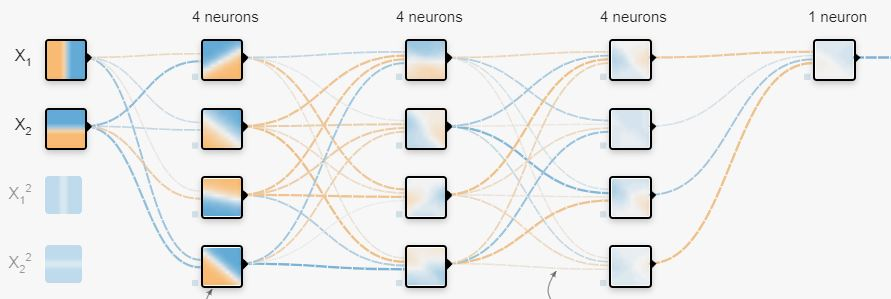

The expression "model.weights" contains the weights obtained as a result of training. To store the initial weights (usually randomly assigned weights), a separate function must be used.

When you create an ANN model, the weights in the model are typically assigned randomly at first. These randomly assigned weights allow the model to make predictions using the input data. However, since the predictions are usually wrong at first, the model is fed with training data, and during training, the weights are gradually adjusted to make better predictions. Once training is complete, the final weights of the model are the ones that have been adjusted to fit the training data as best as possible.

In Keras, you can access a model's weights using the `get_weights()` method. This method returns a list of weights and biases as a NumPy array. To obtain the weights before training, the `get_weights()` method can be called before the model is trained, and the weights can be saved. These weights can later be compared with the post-training weights. Alternatively, the `save_weights()` method can be used to save the model's weights, and a saved version of the pre-training weights can be restored using the `load_weights()` metod.


In [71]:
model.get_weights()

[array([[-1.0597862 ,  2.5832255 , -0.45762062,  0.0986224 ],
        [ 0.2843122 ,  5.2509923 , -0.8142493 , -0.843066  ]],
       dtype=float32),
 array([-0.14573395,  0.9997219 ,  0.        , -0.05383233], dtype=float32),
 array([[-1.8408215e-01, -5.8856887e-01, -8.0198401e-01, -8.3398765e-01],
        [ 3.5014141e+00,  3.8724632e+00,  4.3012891e-02, -2.0941626e-03],
        [ 7.2267991e-01,  8.5307604e-01,  2.0057148e-01,  5.8712405e-01],
        [ 2.6614839e-01, -1.6996270e-01,  7.0593244e-01, -6.6951585e-01]],
       dtype=float32),
 array([ 0.5910087 ,  0.9752856 , -0.35887888, -0.00316228], dtype=float32),
 array([[ 2.7371087 , -0.24981803, -0.32569343, -0.22438735],
        [ 3.691965  , -0.03412706, -0.2496475 , -0.3592217 ],
        [-0.10592017, -0.63438886, -0.20087028, -0.43137842],
        [-0.58743477, -0.13880962, -0.06318015,  0.6264226 ]],
       dtype=float32),
 array([0.9623092, 0.       , 0.       , 0.       ], dtype=float32),
 array([[ 3.9289603 ],
        [-0.59

In [73]:
model.weights                                    

[<Variable path=sequential_2/dense_9/kernel, shape=(2, 4), dtype=float32, value=[[-1.0597862   2.5832255  -0.45762062  0.0986224 ]
  [ 0.2843122   5.2509923  -0.8142493  -0.843066  ]]>,
 <Variable path=sequential_2/dense_9/bias, shape=(4,), dtype=float32, value=[-0.14573395  0.9997219   0.         -0.05383233]>,
 <Variable path=sequential_2/dense_10/kernel, shape=(4, 4), dtype=float32, value=[[-1.8408215e-01 -5.8856887e-01 -8.0198401e-01 -8.3398765e-01]
  [ 3.5014141e+00  3.8724632e+00  4.3012891e-02 -2.0941626e-03]
  [ 7.2267991e-01  8.5307604e-01  2.0057148e-01  5.8712405e-01]
  [ 2.6614839e-01 -1.6996270e-01  7.0593244e-01 -6.6951585e-01]]>,
 <Variable path=sequential_2/dense_10/bias, shape=(4,), dtype=float32, value=[ 0.5910087   0.9752856  -0.35887888 -0.00316228]>,
 <Variable path=sequential_2/dense_11/kernel, shape=(4, 4), dtype=float32, value=[[ 2.7371087  -0.24981803 -0.32569343 -0.22438735]
  [ 3.691965   -0.03412706 -0.2496475  -0.3592217 ]
  [-0.10592017 -0.63438886 -0.2008

* Eğer sadece modelinizin ağırlıklarını bir Numpy dizileri listesi olarak almak istiyorsanız: model.weights kullanabilirsiniz.

* Eğer modelinizin her bir katmanının ağırlıklarına ayrı ayrı erişmek istiyorsanız: model.get_weights() kullanabilirsiniz.

In [75]:
model.history.history # gives the loss values ​​while training the model

{'loss': [256357.9375,
  256201.46875,
  256035.203125,
  255858.0625,
  255670.078125,
  255470.921875,
  255260.546875,
  255038.421875,
  254807.453125,
  254561.296875,
  254297.984375,
  254016.390625,
  253711.3125,
  253385.171875,
  253036.75,
  252663.984375,
  252266.21875,
  251841.234375,
  251390.375,
  250911.109375,
  250400.0,
  249858.859375,
  249288.15625,
  248681.34375,
  248043.640625,
  247371.71875,
  246662.8125,
  245914.78125,
  245129.09375,
  244302.15625,
  243434.625,
  242527.265625,
  241572.09375,
  240578.375,
  239533.140625,
  238445.421875,
  237309.09375,
  236116.984375,
  234882.921875,
  233588.40625,
  232254.765625,
  230861.484375,
  229413.25,
  227904.53125,
  226343.25,
  224727.859375,
  223047.265625,
  221312.296875,
  219511.546875,
  217647.109375,
  215719.984375,
  213727.0625,
  211685.25,
  209560.75,
  207382.375,
  205133.078125,
  202821.578125,
  200452.796875,
  198010.625,
  195501.03125,
  192918.515625,
  190267.078125,
 

The `model.history.history` attribute is a dictionary that contains all the values recorded during the model's training process. These values include the loss (or another metric) recorded during training. This dictionary has an entry for each epoch during the training.

The code `pd.DataFrame(model.history.history)` displays this dictionary in the Pandas DataFrame format. By running this code, you can view the loss values recorded for each epoch in a more organized and readable manner. The values for each epoch are displayed in each row of the DataFram.


In [77]:
pd.DataFrame(model.history.history)

,loss
0,256357.938
1,256201.469
2,256035.203
3,255858.062
4,255670.078
5,255470.922
6,255260.547
7,255038.422
8,254807.453
9,254561.297


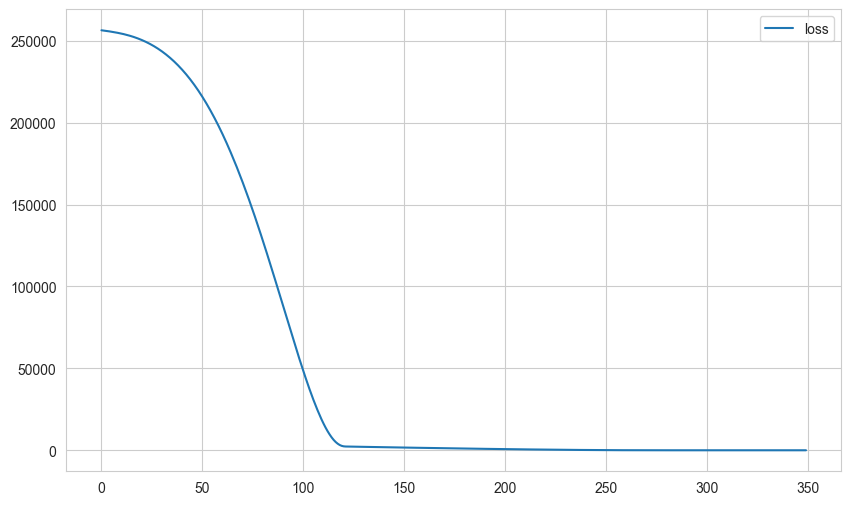

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

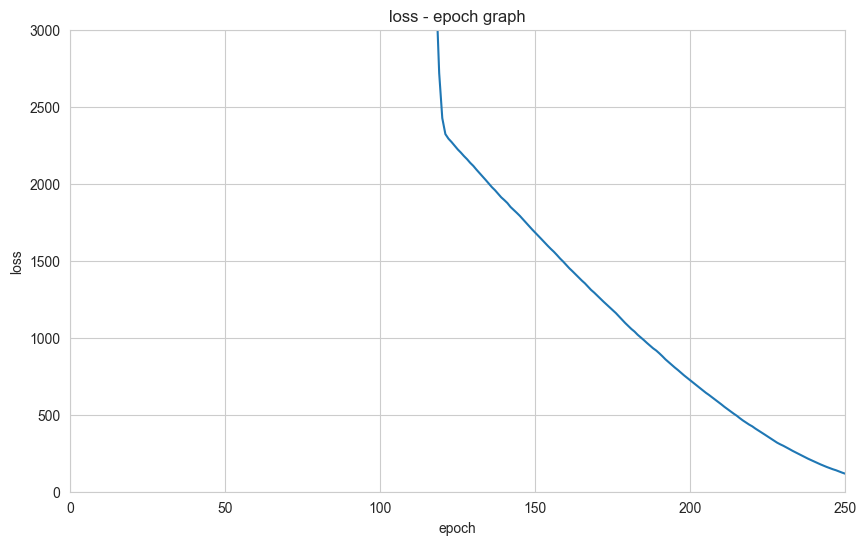

In [83]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values
plt.show()

# <font color='steelblue'> <b>Model Performance</b><font color='black'>  

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [87]:
model.evaluate(X_train, y_train, verbose=0)  # It gives the result of whatever score I gave to loss while creating the model. (for this model it's "mse")
                                             # predicts x and y tests in the background and then evaluates the result.

24.607242584228516

In [89]:
model.evaluate(X_test, y_test, verbose=0)      # performance of the trained model on test data

25.14405632019043

In [91]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - 4ms/step - loss: 25.1441


25.14405632019043

In [93]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [95]:
explained_variance_score(y_test, y_pred)     # It gives the R2 score, if it is close to 1, the model is good.

0.9971715414051369

This code block is used to calculate the "explained variance score," a metric used to measure the accuracy of a machine learning model's predictions on test data.


In [97]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# comparing actual and predicted values

,Actual,Pred
130,475.947,479.864
259,542.984,542.403
74,453.458,453.136
152,480.877,473.678
201,351.429,346.006
225,410.297,399.586
93,438.265,434.696
220,466.004,459.787
111,649.440,640.264
132,487.738,492.862


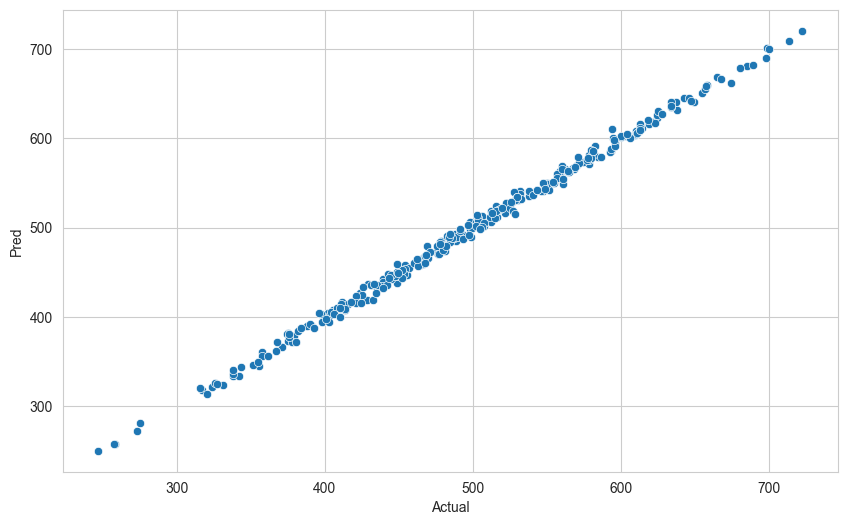

In [99]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

This code block creates a scatter plot that shows the relationship between the actual and predicted values. If the model makes accurate predictions, the points in the scatter plot are expected to be placed close to a line.


In [101]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [103]:
eval_metric(y_test, y_pred)

r2_score: 0.9971401307830438 
mae: 4.015392400531279 
mse: 25.14406071441863 
rmse: 5.014385377533186


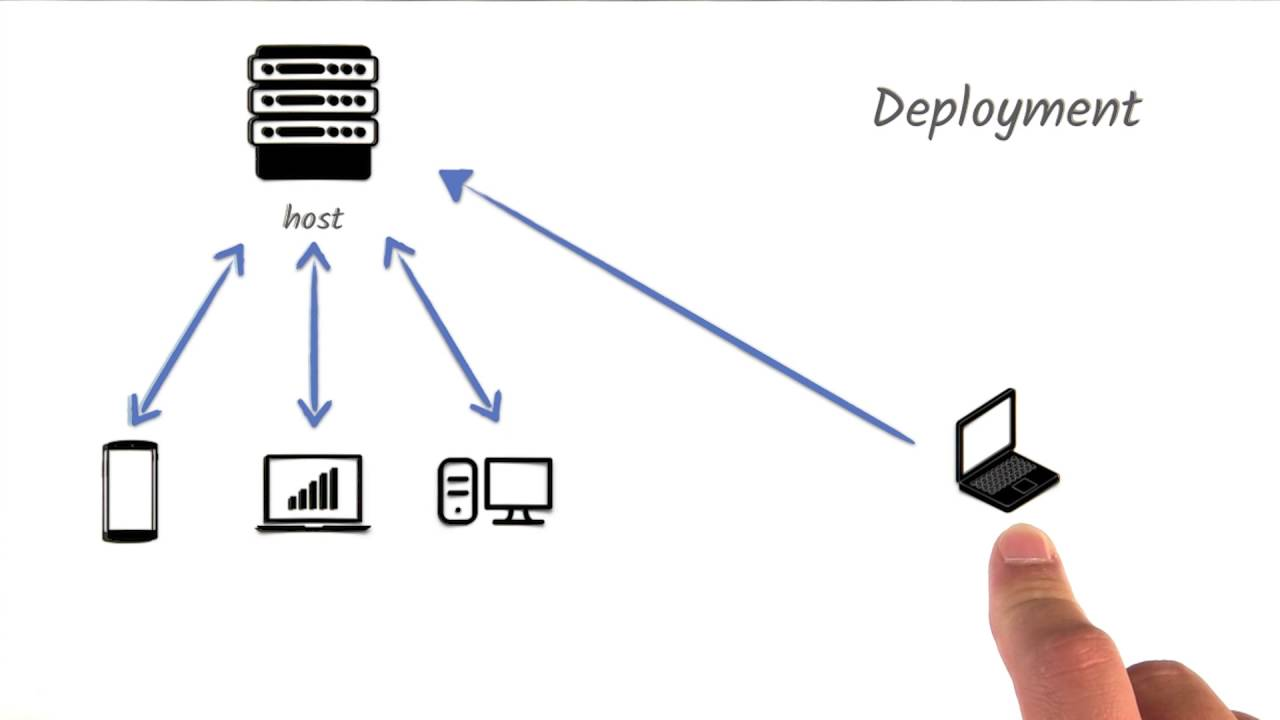

# <font color='steelblue'> <b>Final Model & Prediction</b><font color='black'>  

In [105]:
scaler = MinMaxScaler().fit(X)    # Data scaling is also required in the final model.

In [107]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In Python, the `pickle` module is used to serialize a MinMaxScaler object (named "scaler") and write it to a file called "scaler_fake_reg". This allows us to reload the scaler object when we want to use it again.


In [109]:
X_scaled = scaler.transform(X)

In the final model, after performing data scaling using MinMaxScaler, the scaled version of the data must be obtained. This ensures that the model uses scaled data during training and maintains consistency when the same scaling operation is applied to the test data.

Therefore, by using the "transform" function with the "scaler" object, the scaled version of the "X" dataset, named "X_scaled", is obtained. This ensures that the original range of the data is preserved for each feature while making the features fall within similar range.


In [111]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 258056.6094   
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252683.4688 
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256143.9375 
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253642.9375 
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255546.5625 
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258383.2812 
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256451.7656 
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258165.3438 
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254062.4219 
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256296.1406 
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257843.5000 
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250646.2344 
Epoch 13/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256225.3281
Epoch 14/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

In [59]:
final_model.save('my_model.h5')                  
# While previously saving with H5, the H5 extension stopped working in the new update. This problem can be solved with keras extension.
# The warning below states that the H5 extension is an old method.

In [113]:
from tensorflow.keras.saving import save_model

save_model(final_model, 'my_model.keras')

## <font color='skyblue'> <b>Prediction-1</b><font color='black'>  

In [115]:
from tensorflow.keras.models import load_model

model_fake_reg = load_model('my_model.keras')

In [117]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

This code allows loading an object from a file (typically saved in a previous session) using the pickle module in Python. The example here aims to load a scaler object from a file named "scaler_fake_reg".


In [119]:
sample = [[998, 1000]]    # Creating a sample data manually

In [121]:
sample_scaled = scaler_fake_reg.transform(sample)     # scaling this sample data

In [123]:
model_fake_reg.predict(sample_scaled)                 # predicting with the sample data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[420.79834]], dtype=float32)

## <font color='skyblue'> <b>Prediction-2</b><font color='black'>  

In [125]:
my_dict = {"Feature1": [1020, 1908, 999, 1000, 1001],   # Can also be predicted multiple values.
           "Feature2": [1000, 999, 998, 997, 998]}      # Since we made scale, there is no need to convert it to array as it will give the result as an array.

In [127]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,1020,1000
1,1908,999
2,999,998
3,1000,997
4,1001,998


In [129]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[3.73060091e+00, 5.29806193e-01],
       [1.48130555e+02, 3.53459774e-01],
       [3.15737133e-01, 1.77113355e-01],
       [4.78349694e-01, 7.66936000e-04],
       [6.40962255e-01, 1.77113355e-01]])

In [131]:
model_fake_reg.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[ 1305.9203 ],
       [36935.7    ],
       [  283.60333],
       [  235.12221],
       [  364.06897]], dtype=float32)

<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>